In [167]:
import pandas as pd
import matplotlib.pyplot as plt


### Import Data

In [90]:
pca_data = pd.read_csv('./data/PowerCompanyAssessmentData.csv', encoding='unicode_escape')

In [91]:
pca_data.head()

,age,sex,max_boulder,max_sport,exp,trainexp,country,state,rock,season,...,ancamp_score,aercamp_score,rep1_score,cont_score,pullup_score,pushup_score,ohpr_score,ohpl_score,dl_score,bmi_score
0,43,Female,<V3,5.10c/d,>10 years,<1 year,United States,KY,Sandstone,7-9 months,...,41.0,62.0,31.0,16.0,2.0,6.0,NaN,NaN,NaN,25.1
1,16,Female,V6,5.12c/d,7-8 years,7-8 years,US,Montana,Limestone,4-6 months,...,NaN,NaN,120.0,28.0,15.0,30.0,0.12,0.12,0.88,21.5
2,19,Male,V9,5.13c/d,>10 years,7-8 years,Usa,Georgia,Sandstone,4-6 months,...,114.0,301.0,117.0,54.0,18.0,70.0,NaN,NaN,NaN,22.2
3,34,Male,V8,5.12a/b,>10 years,5-6 years,USA,North Carolina,Granite,4-6 months,...,NaN,NaN,NaN,47.0,15.0,35.0,NaN,NaN,NaN,25.1
4,30,Female,V8,5.12a/b,7-8 years,3-4 years,US,Washington,Granite,4-6 months,...,95.0,210.0,NaN,NaN,5.0,7.0,0.18,0.18,1.02,21.6


### Cleaning

In [92]:
pca_data.dtypes

age                int64
sex               object
max_boulder       object
max_sport         object
exp               object
trainexp          object
country           object
state             object
rock              object
season            object
days              object
height           float64
weight           float64
span             float64
pullup           float64
pushup           float64
continuous        object
maxhang          float64
weightedpull     float64
repeaters1       float64
longcamp         float64
shortcamp        float64
ohpr             float64
ohll             float64
dl               float64
sportgrade        object
bouldergrade      object
powl             float64
powr             float64
Unnamed: 29      float64
hang_score       float64
pull_score       float64
powl_score       float64
powr_score       float64
ancamp_score     float64
aercamp_score    float64
rep1_score       float64
cont_score       float64
pullup_score     float64
pushup_score     float64


In [93]:
pca_data['country'] = pca_data['country'].astype(str)

In [157]:
# clean max_boulder
df = pca_data[pca_data['max_boulder'] != '<V3']
df['max_boulder'] = df['max_boulder'].str.split("V").str[1]
df = df[df['max_boulder'].notnull()]
df['max_boulder'] = df['max_boulder'].apply(lambda x: '0'+ x if x[0] != '1' else x)

# clean country
df['country'] = df['country'].str.upper()
df['country'] = df['country'].apply(lambda x: x.strip())
country_dict = {
    'US':'USA', 
    'UNITED STATES':'USA',
    'UNITES STATES':'USA',
    'UNITED STATES OF AMERICA':'USA',
    'THE UNITED STATES OF AMERICA':'USA',
    'MURICA':'USA',
    'USA USA USA USA USA':'USA',
    'UNITED STATS':'USA',
    'CANADA':'CANADA',
    'MALAWI':'MALAWI',
    'FINLAND': 'FINLAND',
    'GERMANY': 'GERMANY',
    'DEUTSCHLAND': 'GERMANY',
    'AUSTRALIA':'AUSTRALIA',
    'SWEDEN':'SWEDEN',
    'ITALY':'ITALY',
    'ITALIA':'ITALY',
    'IRELAND':'IRELAND',
    'NORGE':'NORWAY',
    'NORWAY':'NORWAY',
    'UNITED KINGDOM':'UK',
    'UK':'UK',
    'INDIA':'INDIA',
    'SPAIN':'SPAIN',
    'COSTA RICA':'COSTA RICA',
    'AUSTRIA':'AUSTRIA',
    'COLOMBIA':'COLOMBIA',
    'TAIWAN':'TAIWAN',
    'ST HELENA':'ST HELENA',
    'ALLEMAGNE':'GERMANY',
    'MÉXICO':'MEXICO',
    'THE NETHERLANDS':'NETHERLANDS',
    'PORTUGAL':'PORTUGAL',
    'SOUTH AFRICA':'SOUTH AFRICA',

    }
df['country'] = df['country'].map(country_dict)

# clean age
bins = [10,20,30,40,50,60]
df['age_bin'] = pd.cut(df['age'],bins)

# clean training experience

/var/folders/_c/ss2y46dd1qj4crb2crlvw9140000gq/T/ipykernel_95982/362887896.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['max_boulder'] = df['max_boulder'].str.split("V").str[1]


array(['7-8 years', '5-6 years', '3-4 years', '1-2 years', '<1 year',
       '>10 years', '9-10 years', nan, '> 10 years', '< 1 year'],
      dtype=object)

## Exploration

Text(0.5, 0, 'age')

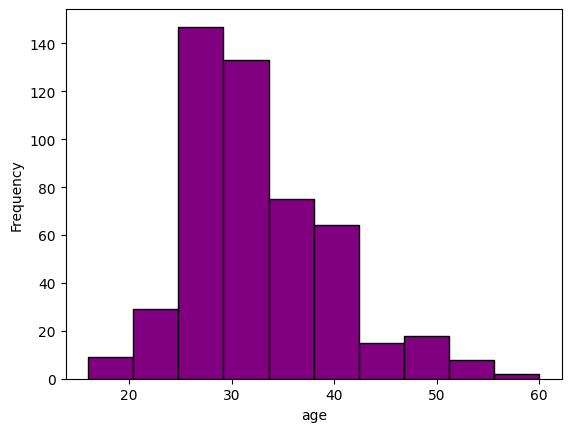

In [158]:
df['age'].plot(kind ='hist',color ='purple', edgecolor ='black')
plt.xlabel('age')

Interestingly we see a normal distrution of Ages for this climbing dataset. I would have expected a more exponential distribution given the popularity of the sport amongst younger ages

<AxesSubplot: xlabel='max_boulder'>

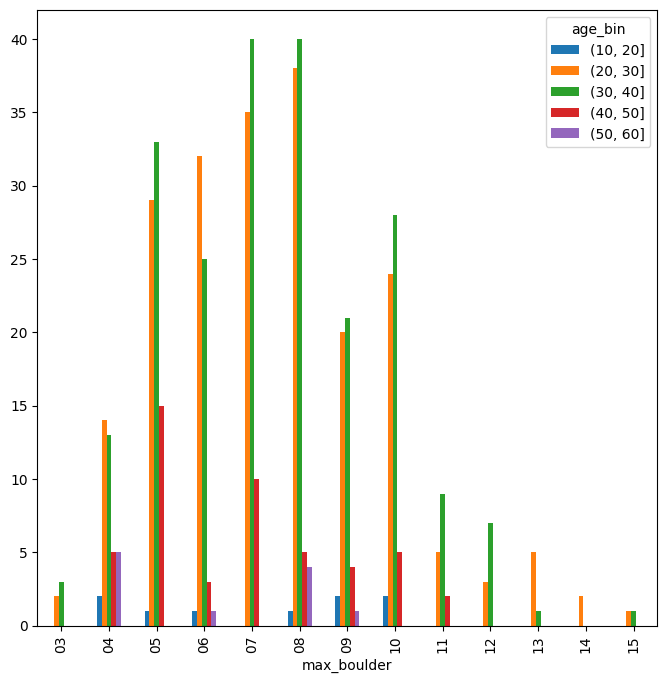

In [162]:
df[['max_boulder','age_bin']].groupby(['max_boulder','age_bin']).size().unstack(level=1).plot(kind ='bar',figsize=(8,8))

As expected we see the ability to send hard boulders deteriote with age, but interestingly there does not seem to be a hughe difference between 20-30 and 30-40. How will this graph look when instead of age we look at training experience.

<AxesSubplot: xlabel='max_boulder'>

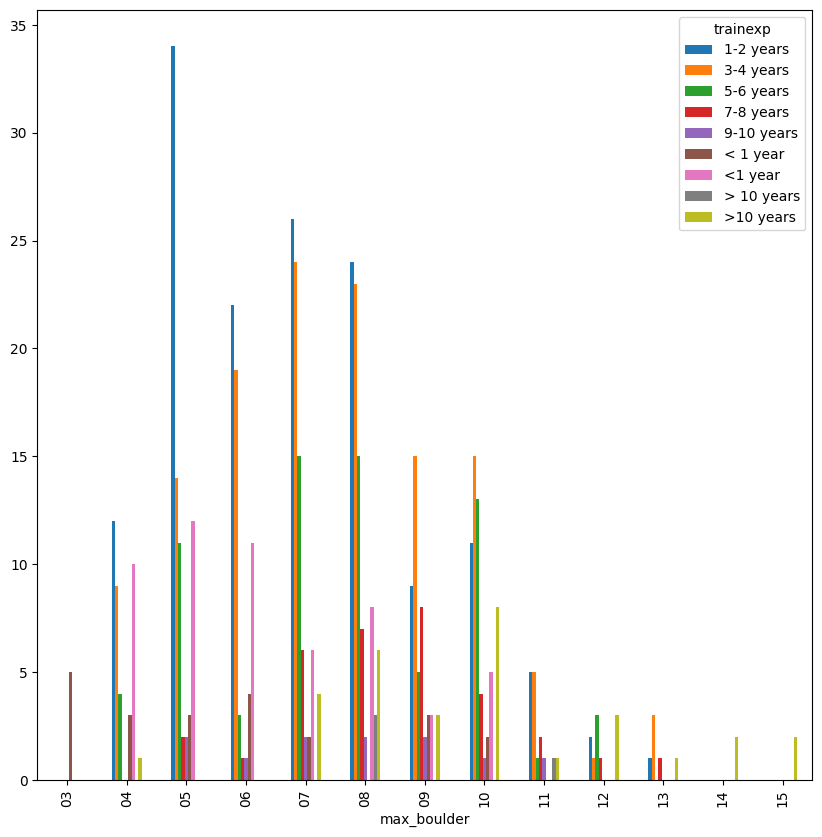

In [166]:
df[['max_boulder','trainexp']].groupby(['max_boulder','trainexp']).size().unstack(level=1).plot(kind ='bar',figsize=(10,10))